In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
wsb_df = pd.read_csv('wsb.csv')
wsb_df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


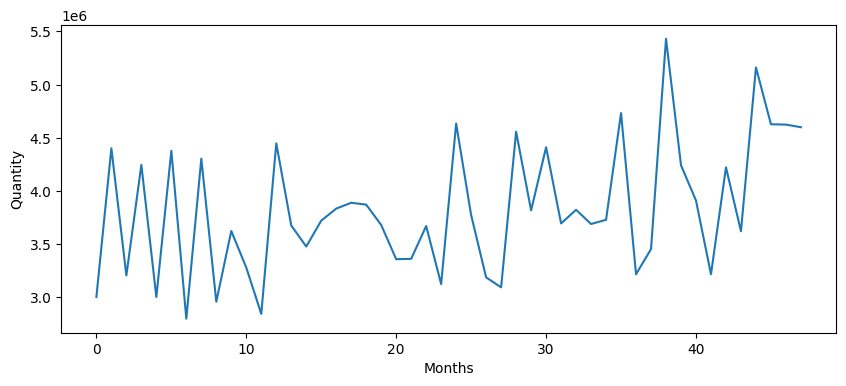

In [10]:
plt.figure(figsize = (10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity']);

In [12]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [14]:
## FORCASTING USING MOVING AVERAGE

In [16]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling(window = 12).mean().shift(1)

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


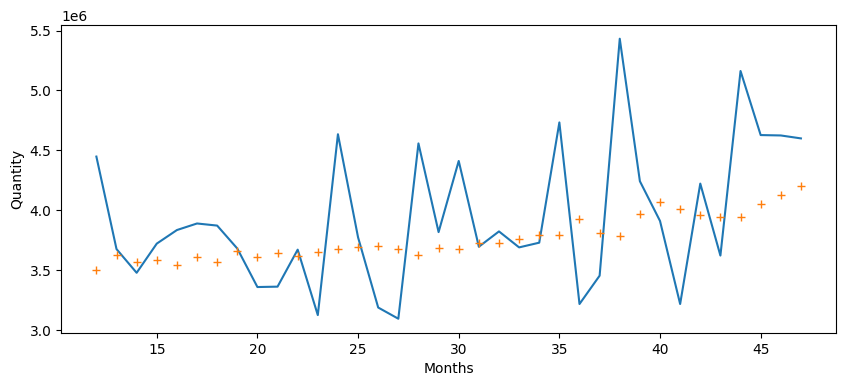

In [30]:
plt.figure(figsize = (10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(wsb_df['Sale Quantity'][12:]);
plt.plot(wsb_df['mavg_12'][12:],'+');
plt.legend;

In [32]:
#MEAN ABSOLUTE PERCENTAGE ERROR(MAPE)

In [34]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

In [38]:
get_mape(wsb_df['Sale Quantity'][36:].values,
         wsb_df['mavg_12'][36:].values)

14.04

In [40]:
#Mape = 14.04%

#### Root Mean Square Method

In [46]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(wsb_df['Sale Quantity'][36:].values,
        wsb_df['mavg_12'][36:].values))

734725.8359239782

#### Exponential Smoothing

In [49]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm(alpha = 0.2).mean()

In [51]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [55]:
# calculating MAPE of the model using records from 37th month

In [57]:
get_mape(wsb_df[['Sale Quantity']][36:].values,
         wsb_df[['ewm']][36:].values)

11.15

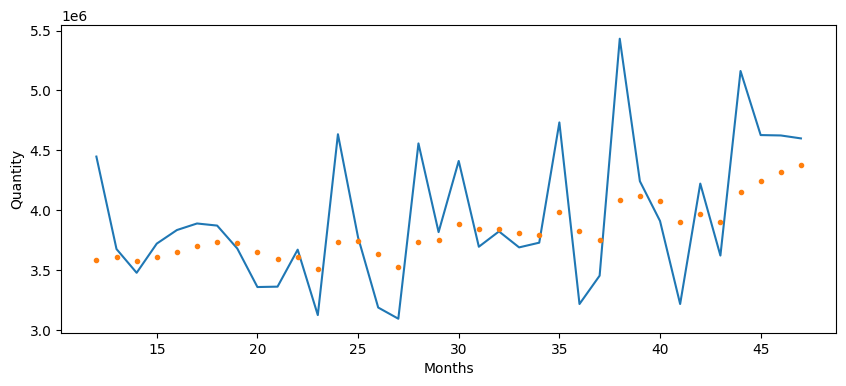

In [61]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['ewm'][12:], '.' );
plt.legend;

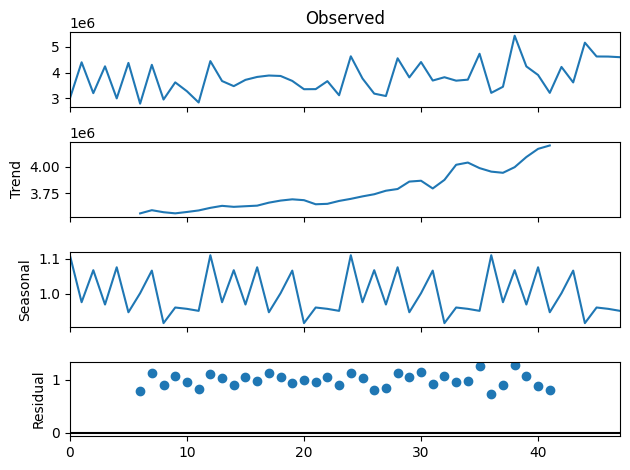

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(wsb_df['Sale Quantity']), model = 'multiplicative', period = 12)
## Plotting the decomposed time series components
ts_plot = ts_decompose.plot()

#### ARIMA
